In [1]:
import glob

In [2]:
img_paths = glob.glob("*.png")

In [3]:
import cv2

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [8]:
import math

category2.png blue: 23.91751012145749, green: 151.27597840755735, red: 169.86622807017545
category1.png blue: 106.20040485829959, green: 128.17400472334683, red: 91.1650641025641
category0.png blue: 177.6918016194332, green: 186.61622807017545, red: 170.5401484480432


Text(0.5, 0, 'red')

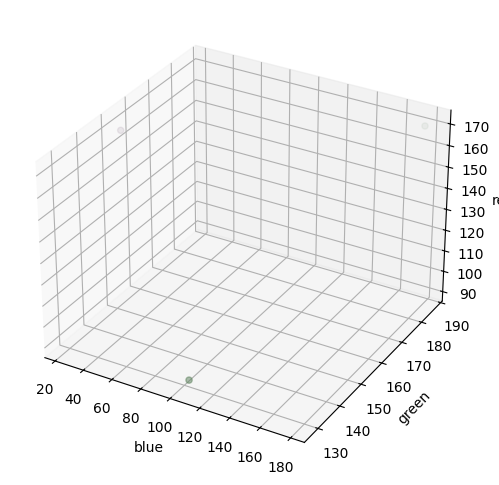

In [13]:
blue_list = []
green_list = []
red_list = []
color_list = []

for img_path in img_paths:
    img = cv2.imread(img_path)
    width = img.shape[1]
    height = img.shape[0]
    x0 = math.floor(width / 4)
    y0 = math.floor(height / 4)
    x1 = math.floor(width * 3 / 4)
    y1 = math.floor(height * 3 / 4)
    extract_area = img[y0:y1, x0:x1]
    blue, green, red = np.mean(extract_area, axis=(0, 1))
    color = [red / 255, green / 255, red / 255, 0.5]
    print("{0} blue: {1}, green: {2}, red: {3}".format(img_path, blue, green, red))
    
    blue_list.append(blue)
    green_list.append(green)
    red_list.append(red)
    color_list.append(color)


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})
ax.scatter(blue_list, green_list, red_list, c=color_list)
ax.set_xlabel("blue")
ax.set_ylabel("green")
ax.set_zlabel("red")